In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
%matplotlib inline
data1 = pd.read_csv('Significant Earthquake Dataset 1900-2023.csv')
data1 = data1.fillna(0)
# data1["Type"]
# # filter = (data1["Type"] == 'earthquake').any()
data1 = data1[data1["Type"] == 'earthquake']
data1.magSource = le.fit_transform(data1.magSource)
data1.MagType = le.fit_transform(data1.MagType)
data1.net = le.fit_transform(data1.net)
data1.locationSource = le.fit_transform(data1.locationSource)
data1.Type = le.fit_transform(data1.Type)
data1 = data1.drop(columns=["Time","Place","ID","Updated","Unnamed: 14","magError","status","Type","locationSource","magSource","net"])
x3 = data1.drop(columns=["Mag"])
y3 = data1["Mag"]
data1.head()
# data1["Type"]
# data1["magSource"]

,Latitude,Longitude,Depth,Mag,MagType,nst,gap,dmin,rms,horizontalError,depthError,magNst
0,-6.5986,132.0763,38.615,6.1,15,119.0,51.0,2.988,0.76,6.41,5.595,23.0
1,-15.0912,167.0294,36.029,5.6,15,81.0,26.0,0.392,0.94,5.99,6.080,18.0
2,12.3238,123.8662,20.088,6.1,15,148.0,47.0,5.487,0.54,8.61,4.399,71.0
3,-40.5465,174.5709,74.320,5.7,15,81.0,40.0,0.768,1.15,3.68,4.922,23.0
4,45.1126,23.1781,10.000,5.6,15,132.0,28.0,1.197,0.40,4.85,1.794,95.0


<Axes: >

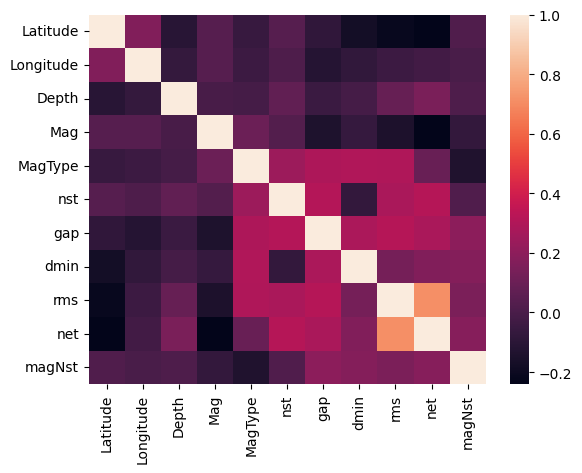

In [38]:
sns.heatmap(data1.corr())

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x3,y3,test_size=0.2)
from sklearn import tree
md = tree.DecisionTreeRegressor(random_state=42)
# from sklearn.metrics import r2_score
# md = r2_score()
md.fit(x_train,y_train)
md.score(x_test,y_test)
# y_predicted = md.predict(x_test)
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_predicted)
# sns.heatmap(cm,annot=True)
# plt.xlabel('Predicted')
# plt.ylabel('Truth')

-0.4518603470658853

In [45]:
from xgboost import XGBRegressor
md = XGBRegressor()
md.fit(x_train,y_train)
md.score(x_test,y_test)

0.2293164086288062

In [46]:
from sklearn.ensemble import RandomForestRegressor
md = RandomForestRegressor()
md.fit(x_train,y_train)
md.score(x_test,y_test)

0.19442099763013543